<a href="https://colab.research.google.com/github/Mizrahi845/My-first-repository-on-GitHub/blob/main/mor_mzrahi_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [22]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

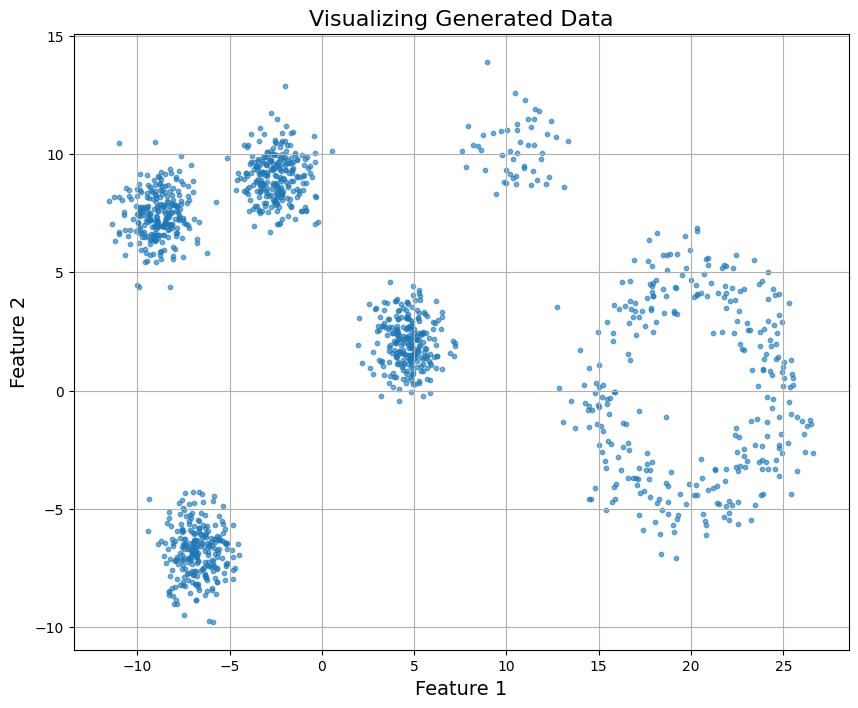

In [23]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Visualizing Generated Data", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

KMeans - k=6, Silhouette Score: 0.7251


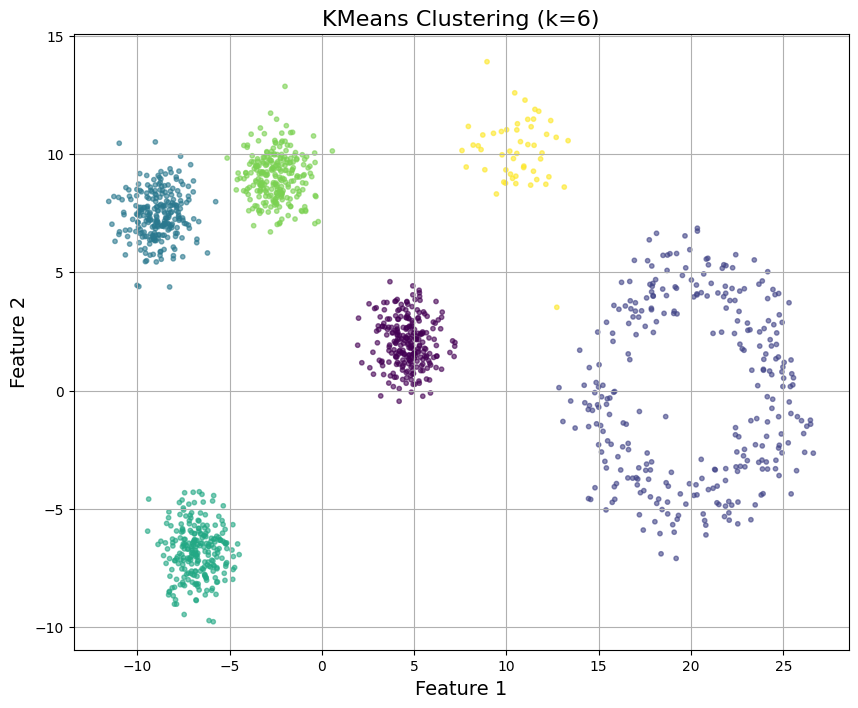

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 6

kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10, max_iter=100, tol=0.00005)
kmeans.fit(X)
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print(f"KMeans - k={k}, Silhouette Score: {kmeans_silhouette:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10, alpha=0.6)
plt.title(f"KMeans Clustering (k={k})", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

Agglomerative - n_clusters=7, Silhouette Score: 0.7015


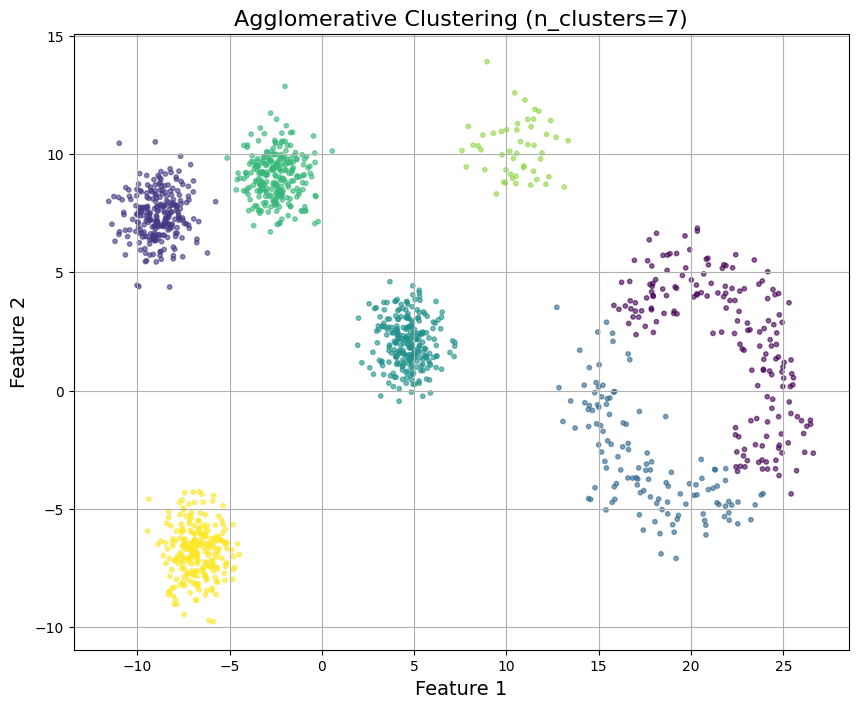

In [46]:
from sklearn.cluster import AgglomerativeClustering

agg_n_clusters = 7

agg = AgglomerativeClustering(n_clusters=agg_n_clusters)
agg.fit(X)
agg_silhouette = silhouette_score(X, agg.labels_)
print(f"Agglomerative - n_clusters={agg_n_clusters}, Silhouette Score: {agg_silhouette:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='viridis', s=10, alpha=0.6)
plt.title(f"Agglomerative Clustering (n_clusters={agg_n_clusters})", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


DBSCAN - eps=2, min_samples=10, Silhouette Score: 0.6133


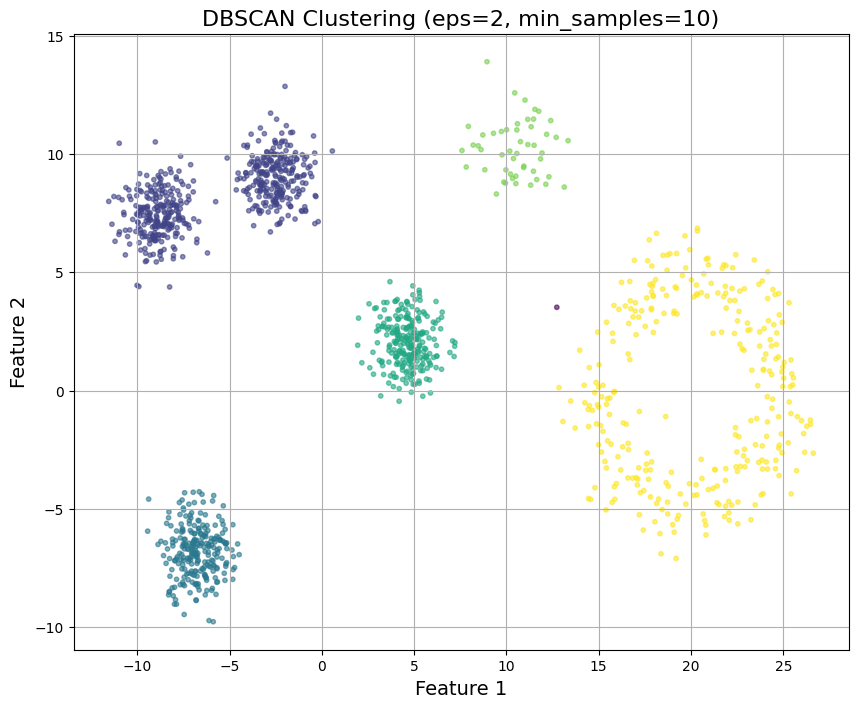

In [47]:
from sklearn.cluster import DBSCAN

eps = 2
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, dbscan_labels)
print(f"DBSCAN - eps={eps}, min_samples={min_samples}, Silhouette Score: {dbscan_silhouette:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.6)
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()

6. Compare the results and choose the

best method for the data
**bold text**




In [48]:
print("\n--- Final Results ---")
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Agglomerative Silhouette Score: {agg_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

silhouette_scores = {
    'KMeans': kmeans_silhouette,
    'Agglomerative': agg_silhouette,
    'DBSCAN': dbscan_silhouette
}

best_algorithm = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_algorithm]

print(f"\nThe best algorithm based on Silhouette Score is: {best_algorithm} with a Silhouette Score of {best_score:.4f}")


--- Final Results ---
KMeans Silhouette Score: 0.7251
Agglomerative Silhouette Score: 0.7015
DBSCAN Silhouette Score: 0.6133

The best algorithm based on Silhouette Score is: KMeans with a Silhouette Score of 0.7251
